In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
database =connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [4]:
cur = database.cursor()

In [5]:
query = 'SELECT * FROM personal_loan_dti;'

cur.execute(query)

393

In [6]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_50760\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [7]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0     1387  Female   38  30-40 years         Single                 1   
1      998    Male   64  >= 60 years        Widowed                 4   
2      100    Male   63  >= 60 years       Divorced                 3   
3     1382    Male   39  30-40 years        Married                 2   
4     1549    Male   46  40-50 years        Married                 3   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor      Government                 Urban             Owned   
2          Bachelor      Government                 Urban            Rented   
3            Master        Salaried                 Urban            Rented   
4          Bachelor   Self-employed                 Urban             Owned   

   ...  loan_amount Loan_bins  loan_term_yrs   loan

In [8]:
df.count()

loan_id                       382
gender                        382
age                           382
AgeGroup                      382
marital_status                382
no_of_dependents              382
educational_level             382
employment_type               382
geographical_location         382
type_of_residence             382
income_annum                  382
income_buckets                382
MonthlySalary                 382
monthly_obligations           382
DTI                           382
savings_account_balance       382
Savings_bins                  382
investment_portfolio_value    382
investment_bins               382
insurance_policies            382
insurance_bins                382
loan_amount                   382
Loan_bins                     382
loan_term_yrs                 382
loan_purpose                  382
approval_status               382
previous_loan_experience      382
credit_history                382
cibil_score                   382
cibil_scorebin

In [9]:
# Create a contingency table for Credit History vs Approval Status
credit_history_vs_approval = pd.crosstab(df['credit_history'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Credit History vs Approval Status")
print(credit_history_vs_approval)


Contingency Table: Credit History vs Approval Status
approval_status  Approved  Rejected
credit_history                     
Excellent              33         4
Fair                   15        11
Good                  103        55
NA/NH                   7         0
Poor                   56        15
Very Good              57        26


In [10]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(credit_history_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=credit_history_vs_approval.index, columns=credit_history_vs_approval.columns))
# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Credit History and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Credit History and Approval Status.")




Chi-Square Test Results:
Chi-Square Statistic: 15.967250913888414
P-Value: 0.006938198676983211
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status    Approved   Rejected
credit_history                        
Excellent         26.248691  10.751309
Fair              18.445026   7.554974
Good             112.089005  45.910995
NA/NH              4.965969   2.034031
Poor              50.369110  20.630890
Very Good         58.882199  24.117801

Reject the null hypothesis: There is a significant association between Credit History and Approval Status.


In [11]:
# Step 1: Prepare the Contingency Table
employment_vs_approval = pd.crosstab(df['employment_type'], df['approval_status'])

# Display the contingency table
print("Contingency Table: Employment Type vs Approval Status")
print(employment_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(employment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=employment_vs_approval.index, columns=employment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Employment Type and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Employment Type and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employment_type', hue='approval_status', palette='viridis')
plt.title('Employment Type vs Approval Status')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: Employment Type vs Approval Status
approval_status  Approved  Rejected
employment_type                    
Government             53        13
Salaried              138        52
Self-employed          80        38
Unemployed              0         8

Chi-Square Test Results:
Chi-Square Statistic: 23.166345500547628
P-Value: 3.7283918283948835e-05
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status    Approved   Rejected
employment_type                       
Government        46.821990  19.178010
Salaried         134.790576  55.209424
Self-employed     83.712042  34.287958
Unemployed         5.675393   2.324607

Reject the null hypothesis: There is a significant association between Employment Type and Approval Status.


In [12]:
# Step 1: Prepare the Contingency Table
income_vs_approval = pd.crosstab(df['income_buckets'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(income_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(income_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=income_vs_approval.index, columns=income_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between income and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between income and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_buckets', hue='approval_status', palette='viridis')
plt.title('Income vs Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
income_buckets                     
0-5 Lakhs              30        11
10-15 Lakhs            89        37
15-20 Lakhs            76        34
5-10 Lakhs             76        29

Chi-Square Test Results:
Chi-Square Statistic: 0.39287030240139753
P-Value: 0.9417113536777244
Degrees of Freedom: 3

Expected Frequencies Table:
approval_status   Approved   Rejected
income_buckets                       
0-5 Lakhs        29.086387  11.913613
10-15 Lakhs      89.387435  36.612565
15-20 Lakhs      78.036649  31.963351
5-10 Lakhs       74.489529  30.510471

Fail to reject the null hypothesis: There is no significant association between income and Approval Status.


Contingency Table: income_buckets vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.2880                  1         0
0.5500                  0         1
0.6781                  1         0
0.8462                  0         1
0.9502                  1         0
...                   ...       ...
133.6077                1         0
142.0246                1         0
145.5941                1         0
150.5604                0         1
154.1424                1         0

[382 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 382.0
P-Value: 0.47594119300583393
Degrees of Freedom: 381

Expected Frequencies Table:
approval_status  Approved  Rejected
DTI                                
0.2880           0.709424  0.290576
0.5500           0.709424  0.290576
0.6781           0.709424  0.290576
0.8462           0.709424  0.290576
0.9502           0.709424  0.290576
...                   ...       ...
133.6077         0.709424  0.29

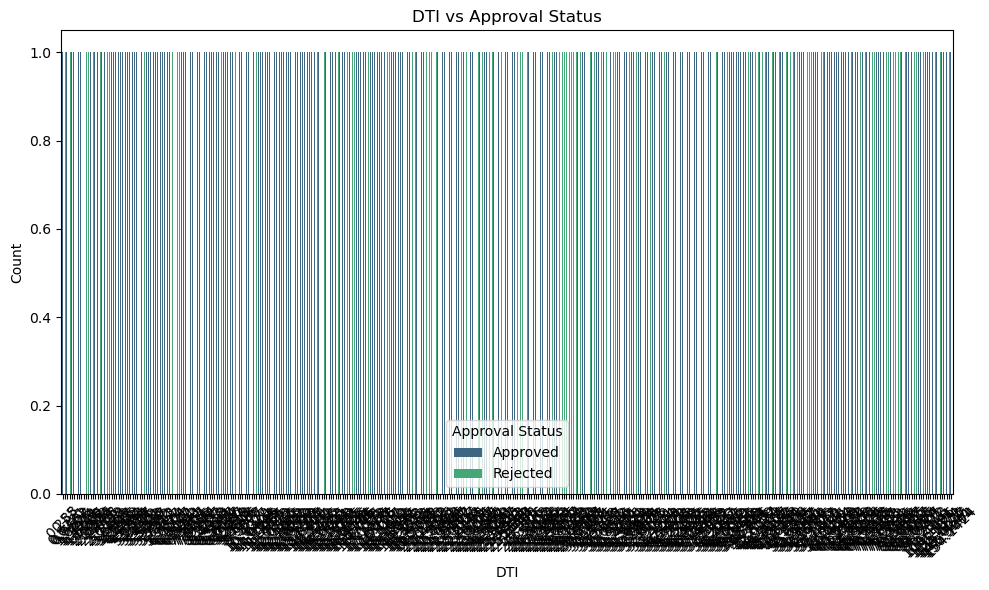

In [15]:
# Step 1: Prepare the Contingency Table
DTI_vs_approval = pd.crosstab(df['DTI'], df['approval_status'])

# Display the contingency table
print("Contingency Table: income_buckets vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(DTI_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=DTI_vs_approval.index, columns=DTI_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between DTI and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between DTI and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DTI', hue='approval_status', palette='viridis')
plt.title('DTI vs Approval Status')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: savings vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.2880                  1         0
0.5500                  0         1
0.6781                  1         0
0.8462                  0         1
0.9502                  1         0
...                   ...       ...
133.6077                1         0
142.0246                1         0
145.5941                1         0
150.5604                0         1
154.1424                1         0

[382 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 2.2146845858911783
P-Value: 0.6963417519841844
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status   Approved   Rejected
Savings_bins                         
 0-1L            53.916230  22.083770
1L-2L            55.335079  22.664921
2L-3L            55.335079  22.664921
3L-4L            58.882199  24.117801
4L-5L            47.531414  19.468586

Fail to reject the null hypothesis: There is no s

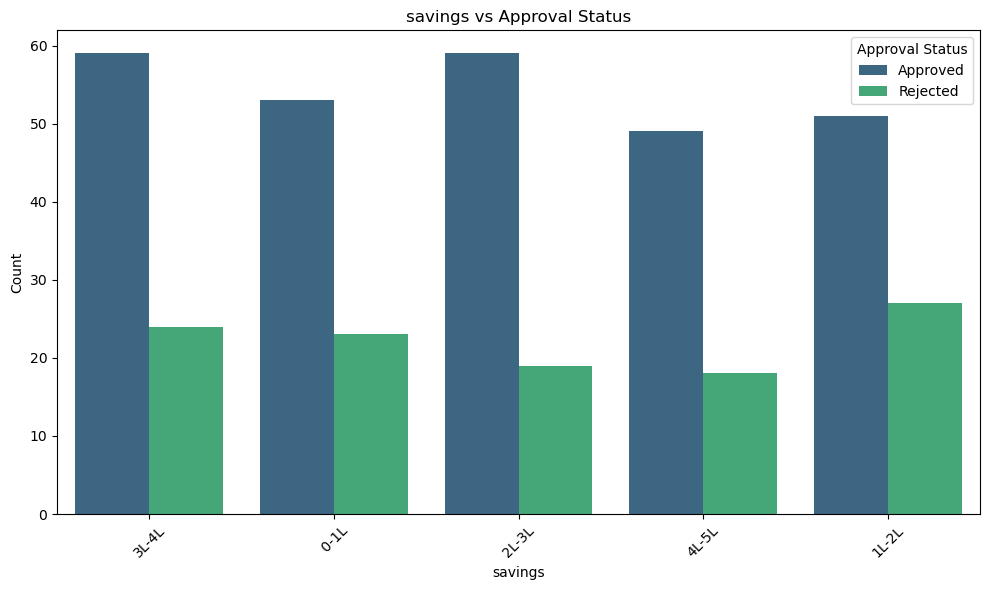

In [16]:
# Step 1: Prepare the Contingency Table
savings_vs_approval = pd.crosstab(df['Savings_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: savings vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(savings_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=savings_vs_approval.index, columns=savings_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between savings and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between savings and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Savings_bins', hue='approval_status', palette='viridis')
plt.title('savings vs Approval Status')
plt.xlabel('savings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

In [17]:
# Step 1: Prepare the Contingency Table
investment_vs_approval = pd.crosstab(df['investment_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(investment_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=investment_vs_approval.index, columns=investment_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between investment and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between investment and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='investment_bins', hue='approval_status', palette='viridis')
plt.title('investment vs Approval Status')
plt.xlabel('investment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.2880                  1         0
0.5500                  0         1
0.6781                  1         0
0.8462                  0         1
0.9502                  1         0
...                   ...       ...
133.6077                1         0
142.0246                1         0
145.5941                1         0
150.5604                0         1
154.1424                1         0

[382 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 11.415920658744682
P-Value: 0.022266646353931184
Degrees of Freedom: 4

Expected Frequencies Table:
approval_status   Approved   Rejected
investment_bins                      
 0-2L            48.950262  20.049738
2L-4L            58.172775  23.827225
4L-6L            62.429319  25.570681
6L-8L            51.787958  21.212042
8L-10L           49.659686  20.340314

Reject the null hypothesis: There is a signi

Contingency Table: investment vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.2880                  1         0
0.5500                  0         1
0.6781                  1         0
0.8462                  0         1
0.9502                  1         0
...                   ...       ...
133.6077                1         0
142.0246                1         0
145.5941                1         0
150.5604                0         1
154.1424                1         0

[382 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of Freedom: 0

Expected Frequencies Table:
approval_status  Approved  Rejected
Loan_bins                          
 0-1Cr              271.0     111.0

Fail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.


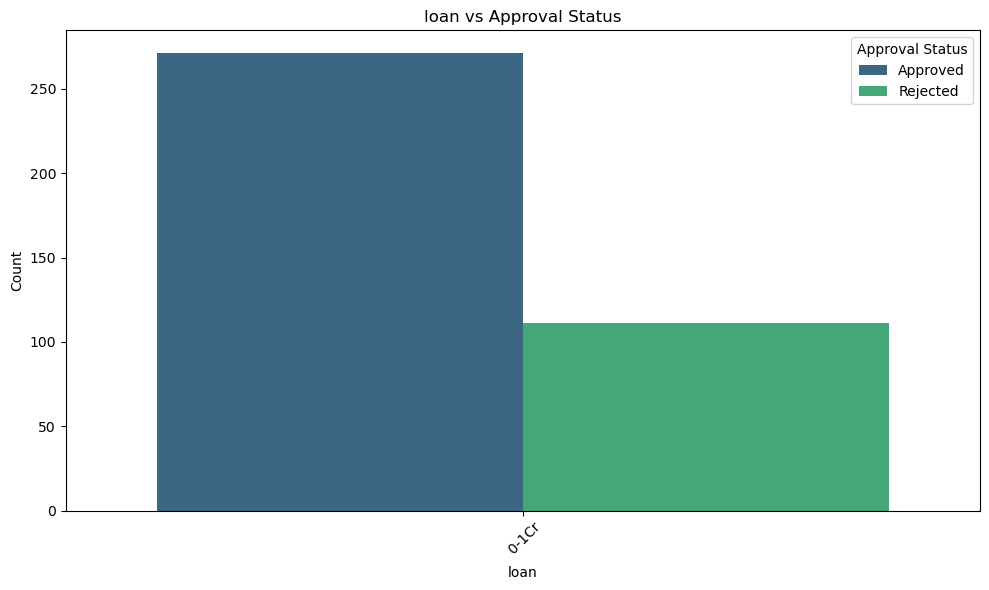

In [18]:
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['Loan_bins'], df['approval_status'])

# Display the contingency table
print("Contingency Table: investment vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between loan amount and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between loan amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Loan_bins', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()

Contingency Table: previous_loan_experience vs Approval Status
approval_status  Approved  Rejected
DTI                                
0.2880                  1         0
0.5500                  0         1
0.6781                  1         0
0.8462                  0         1
0.9502                  1         0
...                   ...       ...
133.6077                1         0
142.0246                1         0
145.5941                1         0
150.5604                0         1
154.1424                1         0

[382 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 2.4042931970442165
P-Value: 0.30054836229995546
Degrees of Freedom: 2

Expected Frequencies Table:
approval_status             Approved   Rejected
previous_loan_experience                       
Negative                   22.701571   9.298429
None                      140.465969  57.534031
Positive                  107.832461  44.167539

Fail to reject the null hypothesis: There is no significa

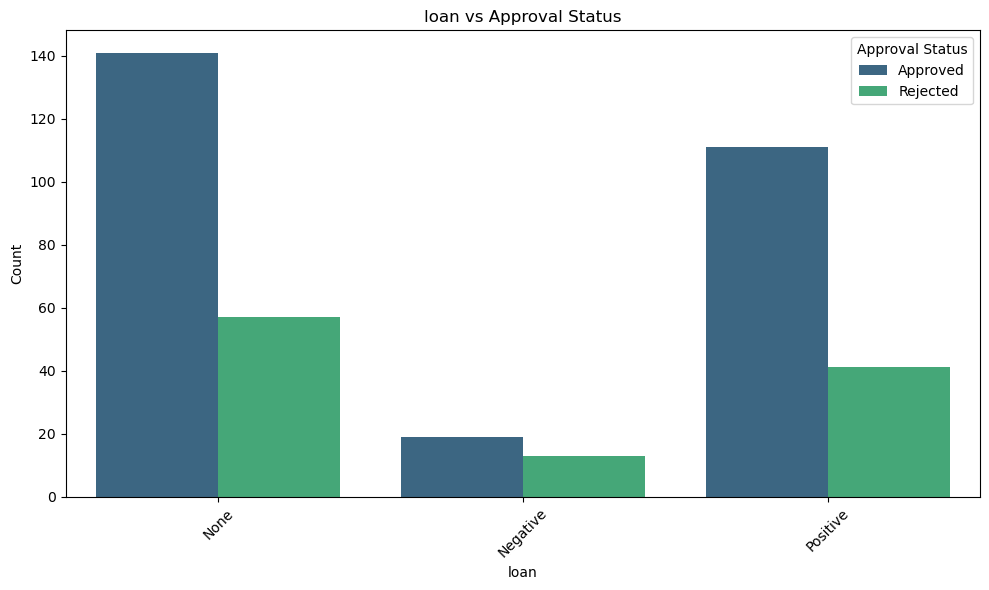

In [19]:

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['previous_loan_experience'], df['approval_status'])

# Display the contingency table
print("Contingency Table: previous_loan_experience vs Approval Status")
print(DTI_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between Loan Exp and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between Loan Exp amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='previous_loan_experience', hue='approval_status', palette='viridis')
plt.title('loan vs Approval Status')
plt.xlabel('loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: cibil_score vs Approval Status
approval_status  Approved  Rejected
cibil_score                        
0                       7         0
320                     0         1
326                     1         0
328                     0         1
332                     0         1
...                   ...       ...
889                     2         0
890                     1         0
894                     2         0
897                     1         0
899                     1         0

[234 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 220.05626364371753
P-Value: 0.719059582990816
Degrees of Freedom: 233

Expected Frequencies Table:
approval_status  Approved  Rejected
cibil_score                        
0                4.965969  2.034031
320              0.709424  0.290576
326              0.709424  0.290576
328              0.709424  0.290576
332              0.709424  0.290576
...                   ...       ...
889              1.4188

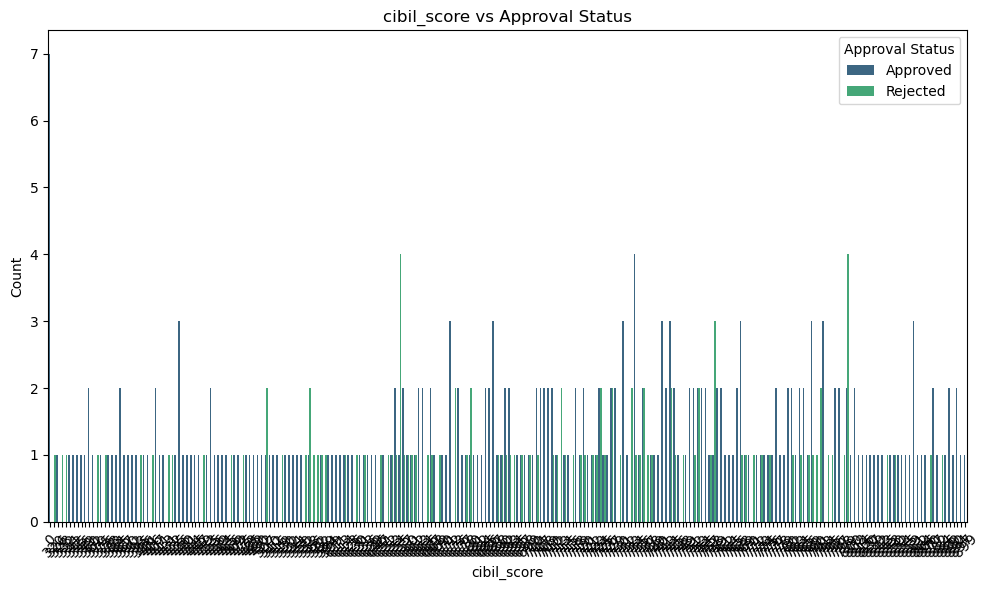

In [20]:
#cibil_score

#previous_loan_experience
#Loan_bins
# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['cibil_score'], df['approval_status'])

# Display the contingency table
print("Contingency Table: cibil_score vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between cibil_score and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between cibil_score amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cibil_score', hue='approval_status', palette='viridis')
plt.title('cibil_score vs Approval Status')
plt.xlabel('cibil_score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


Contingency Table: term_bins vs Approval Status
approval_status  Approved  Rejected
loan_term_yrs                      
5                      44        26
10                     37        18
15                     47        18
20                     62        11
25                     38        15
30                     43        23

Chi-Square Test Results:
Chi-Square Statistic: 10.656315421417533
P-Value: 0.05863649717584963
Degrees of Freedom: 5

Expected Frequencies Table:
approval_status   Approved   Rejected
loan_term_yrs                        
5                49.659686  20.340314
10               39.018325  15.981675
15               46.112565  18.887435
20               51.787958  21.212042
25               37.599476  15.400524
30               46.821990  19.178010

Fail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.


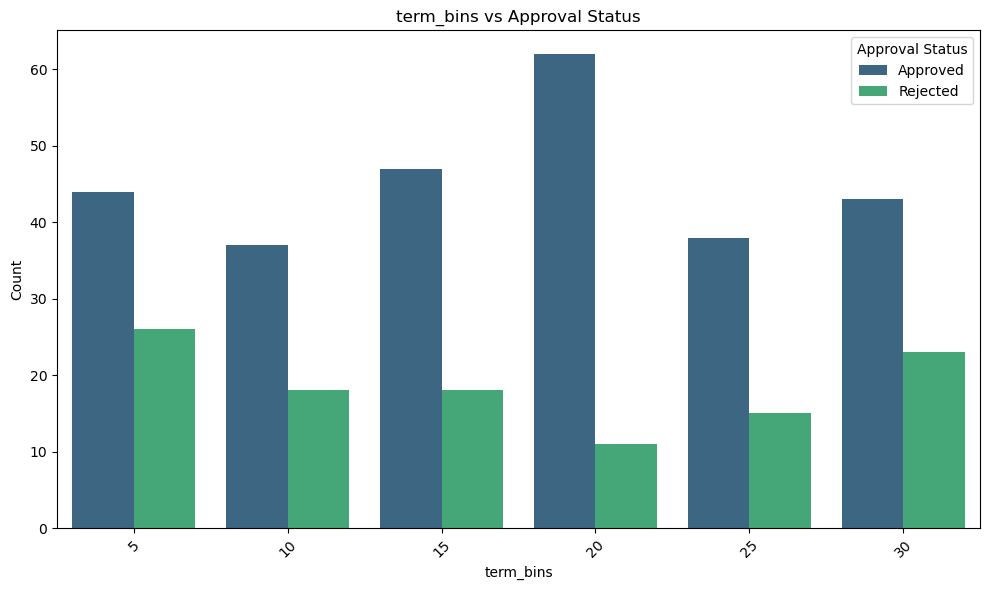

In [21]:

#term_bins

# Step 1: Prepare the Contingency Table
loan_vs_approval = pd.crosstab(df['loan_term_yrs'], df['approval_status'])

# Display the contingency table
print("Contingency Table: term_bins vs Approval Status")
print(loan_vs_approval)

# Step 2: Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(loan_vs_approval)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=loan_vs_approval.index, columns=loan_vs_approval.columns))

# Step 3: Interpret the Results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant association between term_bins and Approval Status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant association between term_bins amount and Approval Status.")

# Step 4: Visualize the Relationship (Optional)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_term_yrs', hue='approval_status', palette='viridis')
plt.title('term_bins vs Approval Status')
plt.xlabel('term_bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Define a function to conduct a Two-Sample T-Test for a given feature
def conduct_ttest(feature):
    approved_values = approved_df[feature].dropna()  # Drop missing values if any
    rejected_values = rejected_df[feature].dropna()  # Drop missing values if any

    # Perform the Two-Sample T-Test
    t_stat, p_value = ttest_ind(approved_values, rejected_values)

    # Print the results
    print(f"\nTwo-Sample T-Test for {feature}:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
    
    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between approved and rejected applications.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between approved and rejected applications.")

# Perform T-Tests for each feature
features_to_analyze = ['DTI', 'MonthlySalary', 'investment_portfolio_value','cibil_score']
for feature in features_to_analyze:
    conduct_ttest(feature)



Two-Sample T-Test for DTI:
T-Statistic: -1.118402387558024
P-Value: 0.26410168726038336
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between approved and rejected applications.

Two-Sample T-Test for MonthlySalary:
T-Statistic: -0.43803329060345036
P-Value: 0.661611037255375
Fail to reject the null hypothesis: There is no significant difference in the mean MonthlySalary between approved and rejected applications.

Two-Sample T-Test for investment_portfolio_value:
T-Statistic: 2.4626984078309917
P-Value: 0.014232345635658512
Reject the null hypothesis: There is a significant difference in the mean investment_portfolio_value between approved and rejected applications.

Two-Sample T-Test for cibil_score:
T-Statistic: -1.0184006273290502
P-Value: 0.3091355438859454
Fail to reject the null hypothesis: There is no significant difference in the mean cibil_score between approved and rejected applications.


In [23]:
import pandas as pd
from scipy.stats import f_oneway


# Define a function to conduct One-Way ANOVA for a given numeric feature and categorical group
def conduct_anova(feature, group_by):
    # Group the data by the categorical variable and collect the feature values in each group
    unique_groups = df[group_by].unique()
    groups_data = [df[df[group_by] == group][feature].dropna() for group in unique_groups]

    # Perform One-Way ANOVA
    f_stat, p_value = f_oneway(*groups_data)

    # Print the results
    print(f"\nOne-Way ANOVA for {feature} by {group_by}:")
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in the mean {feature} between different {group_by} categories.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in the mean {feature} between different {group_by} categories.")

# Perform ANOVA for Loan Amount vs. Employment Type
conduct_anova('loan_amount', 'employment_type')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'income_buckets')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'cibil_score')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'previous_loan_experience')

# Perform ANOVA for DTI vs. Income Buckets
conduct_anova('DTI', 'Savings_bins')





One-Way ANOVA for loan_amount by employment_type:
F-Statistic: 0.2578219398199019
P-Value: 0.8557476205527533
Fail to reject the null hypothesis: There is no significant difference in the mean loan_amount between different employment_type categories.

One-Way ANOVA for DTI by income_buckets:
F-Statistic: 69.01198014286771
P-Value: 1.3076707361651224e-35
Reject the null hypothesis: There is a significant difference in the mean DTI between different income_buckets categories.

One-Way ANOVA for DTI by cibil_score:
F-Statistic: 0.5671327014723743
P-Value: 0.9999472456200997
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between different cibil_score categories.

One-Way ANOVA for DTI by previous_loan_experience:
F-Statistic: 1.2508297902263767
P-Value: 0.28744616170176995
Fail to reject the null hypothesis: There is no significant difference in the mean DTI between different previous_loan_experience categories.

One-Way ANOVA for DTI by Savings_bin